In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from wordcloud import WordCloud
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
path = "/content/data.csv"
df = pd.read_csv(path)

In [31]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [32]:
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [33]:
print(f'Rows :{df.shape[0]}\nColumns:{df.shape[1]}')

df.info()

Rows :8518
Columns:8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [34]:
df = df.drop_duplicates()
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [35]:
df.isna().sum()

Reviewer Name        6
Review Title         6
Place of Review     46
Up Votes             6
Down Votes           6
Month              461
Review text          4
Ratings              0
dtype: int64

In [36]:
df.dropna(subset=['Review text'], inplace=True)

In [37]:
print(f'Rows :{df.shape[0]}\nColumns:{df.shape[1]}')

df.info()

Rows :8510
Columns:8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8510 entries, 0 to 8509
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8510 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 598.4+ KB


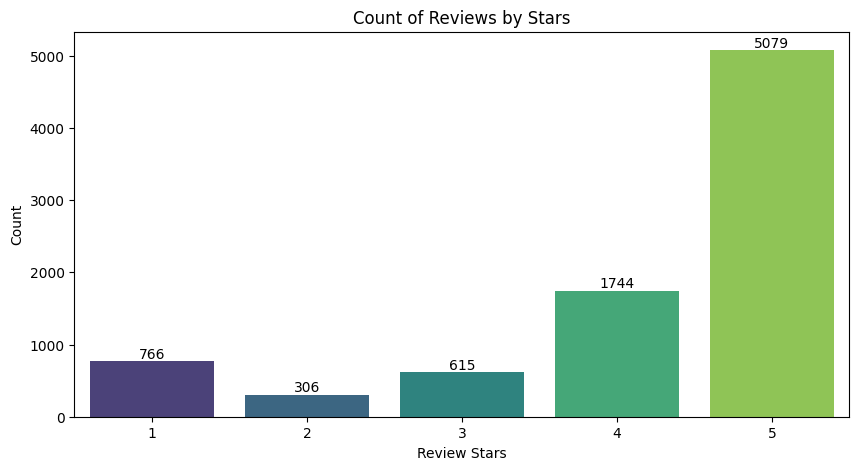

In [38]:
rating_counts = df['Ratings'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
ax.set_title('Count of Reviews by Stars')
ax.set_xlabel('Review Stars')
ax.set_ylabel('Count')

for i, count in enumerate(rating_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [39]:
def categorize_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Ratings'].apply(categorize_sentiment)

In [40]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,Neutral
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
...,...,...,...,...,...,...,...,...,...
8505,MD. Jabbar,Very Good,NaN,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3,Neutral
8506,Abani Behera,Don't waste your money,NaN,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4,Positive
8507,vishnu varma,Really Nice,"Certified Buyer, Agartala",0.0,1.0,Sep 2016,Nice delivery speedREAD MORE,5,Positive
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5,Positive


In [41]:
df['Sentiment'].value_counts(normalize=True)

Positive    0.801763
Negative    0.125969
Neutral     0.072268
Name: Sentiment, dtype: float64

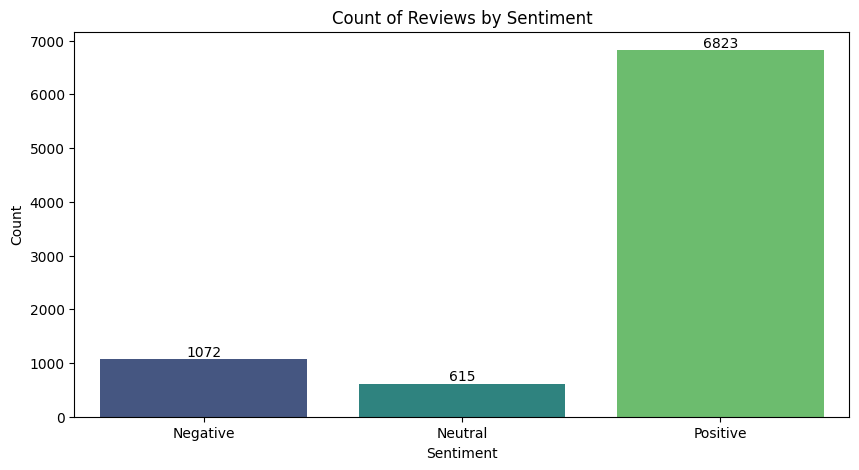

In [42]:
rating_counts = df['Sentiment'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
ax.set_title('Count of Reviews by Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

for i, count in enumerate(rating_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [43]:
df['Review text'] = df['Review text'].str.replace('READ MORE', '')

In [44]:
df=df[df['Sentiment']!='Neutral']

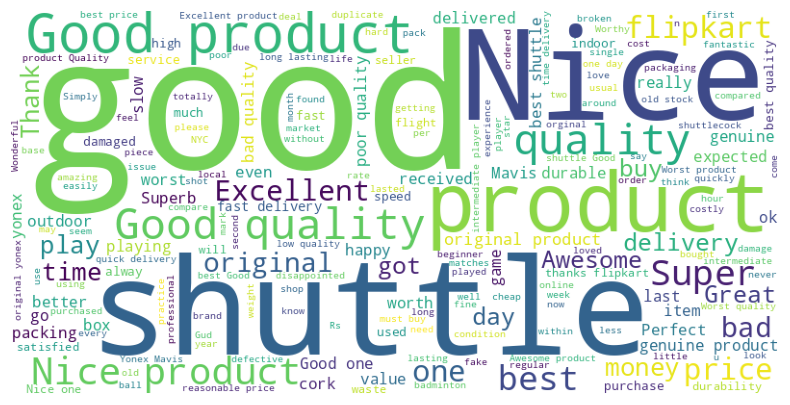

In [45]:
wc = WordCloud(background_color='white',
               width=800,
               height=400).generate(' '.join(df['Review text']))
plt.figure(1,figsize=(10,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [46]:
X=df[['Review text']]
y=df['Sentiment']# this is the column we are learning to predict.
print(X.shape, y.shape)

(7895, 1) (7895,)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5921, 1) (5921,)
(1974, 1) (1974,)


In [48]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [49]:
def preprocess(text, flag):
    # remove special characters
    sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    # convert sentence into lower case
    sentence = sentence.lower()
    # tokenize sentence into words
    tokens = sentence.split()
    # remove stop words
    clean_tokens = [token for token in tokens if token not in stopwords.words("english")]
    # stemming/lemmatization
    if flag == 'stem':
        clean_tokens = [stemmer.stem(token) for token in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]
    return pd.Series(' '.join(clean_tokens))

In [50]:

%time X_train_transformed = X_train['Review text'].progress_apply(lambda x: preprocess(x, flag='lemma'))
X_train_transformed.head()

100%|██████████| 5921/5921 [00:05<00:00, 1005.94it/s]

CPU times: user 4.36 s, sys: 455 ms, total: 4.81 s
Wall time: 5.9 s


,0
1460,valuable
2023,super super nice
1790,nice shuttle
4449,original brand
2770,good product


In [51]:
X_train_transformed.columns = ['clean_text_lemma']

X_train_transformed.head()

,clean_text_lemma
1460,valuable
2023,super super nice
1790,nice shuttle
4449,original brand
2770,good product


In [52]:
%time X_test_transformed= X_test['Review text'].progress_apply(lambda x: preprocess(x, flag='lemma'))
X_test_transformed.head()

100%|██████████| 1974/1974 [00:02<00:00, 854.07it/s] 

CPU times: user 2.01 s, sys: 204 ms, total: 2.21 s
Wall time: 2.33 s


,0
8447,rate got box nothing diffrence customer like e...
7481,gud quality
3978,evergreen
2034,original product intermediate good
5346,nice original product love playing badminton


In [53]:
X_test_transformed.columns = ['clean_text_lemma']

X_test_transformed.head()

,clean_text_lemma
8447,rate got box nothing diffrence customer like e...
7481,gud quality
3978,evergreen
2034,original product intermediate good
5346,nice original product love playing badminton


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train_transformed['clean_text_lemma'])

print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 2003
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (5921, 2003)


In [55]:
X_test_bow = vocab.transform(X_test_transformed['clean_text_lemma'])

print("Shape of input data:", X_test_bow.shape)

Shape of input data: (1974, 2003)


# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression(penalty = 'elasticnet',  C=1.0, solver = 'saga', l1_ratio = 0.5, class_weight ='balanced')
classifier.fit(X_train_bow, y_train)

LogisticRegression(class_weight='balanced', l1_ratio=0.5, penalty='elasticnet',
                   solver='saga')

Accuracy on Train Data: 0.9349771997973315
              precision    recall  f1-score   support

    Negative       0.72      0.86      0.78       806
    Positive       0.98      0.95      0.96      5115

    accuracy                           0.93      5921
   macro avg       0.85      0.90      0.87      5921
weighted avg       0.94      0.93      0.94      5921

Normalized Confusion Matrix on Train Data:
[[0.86 0.14]
 [0.05 0.95]]


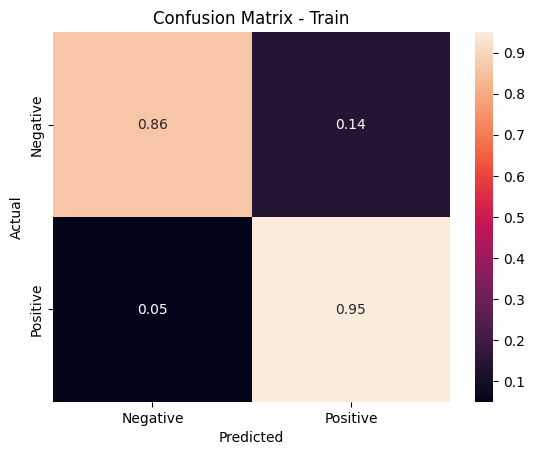

Accuracy on Test Data: 0.9103343465045592
              precision    recall  f1-score   support

    Negative       0.63      0.80      0.71       266
    Positive       0.97      0.93      0.95      1708

    accuracy                           0.91      1974
   macro avg       0.80      0.86      0.83      1974
weighted avg       0.92      0.91      0.91      1974

Normalized Confusion Matrix on Test Data: 
[[0.8  0.2 ]
 [0.07 0.93]]


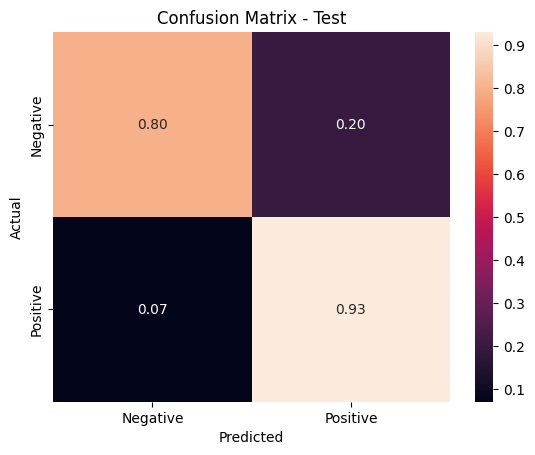

In [57]:
y_train_pred = classifier.predict(X_train_bow)
print("Accuracy on Train Data:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


train_cm = metrics.confusion_matrix(y_train, y_train_pred)
train_actual = np.sum(train_cm, axis=1).reshape(-1, 1)

train_cmn = np.round(train_cm/train_actual, 2)

print("Normalized Confusion Matrix on Train Data:")
print(train_cmn)

sns.heatmap(train_cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Train')
plt.show()


y_test_pred = classifier.predict(X_test_bow)
print("Accuracy on Test Data:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

test_cm = metrics.confusion_matrix(y_test, y_test_pred)
test_actual = np.sum(test_cm, axis=1).reshape(-1, 1)

test_cmn = np.round(test_cm/test_actual, 2)

print("Normalized Confusion Matrix on Test Data: ")
print(test_cmn)

sns.heatmap(test_cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')

plt.xlabel('Predicted')
plt.title('Confusion Matrix - Test')
plt.show()

#  Decision tree classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, y_train)

y_test_pred = classifier.predict(X_test_bow)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9154002026342452
              precision    recall  f1-score   support

    Negative       0.69      0.67      0.68       266
    Positive       0.95      0.95      0.95      1708

    accuracy                           0.92      1974
   macro avg       0.82      0.81      0.82      1974
weighted avg       0.91      0.92      0.91      1974



In [77]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = classifier.predict(X_train_bow)

print(metrics.accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

0.9777064685019422
              precision    recall  f1-score   support

    Negative       0.96      0.87      0.91       806
    Positive       0.98      0.99      0.99      5115

    accuracy                           0.98      5921
   macro avg       0.97      0.93      0.95      5921
weighted avg       0.98      0.98      0.98      5921



# Multinomial

In [60]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_bow, y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 23.5 ms, sys: 0 ns, total: 23.5 ms
Wall time: 30.5 ms


MultinomialNB()

In [61]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_bow)

metrics.accuracy_score(y_train, y_train_pred)

0.942239486573214

In [62]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 546,  260],
       [  82, 5033]])

Text(0.5, 23.52222222222222, 'Predicted')

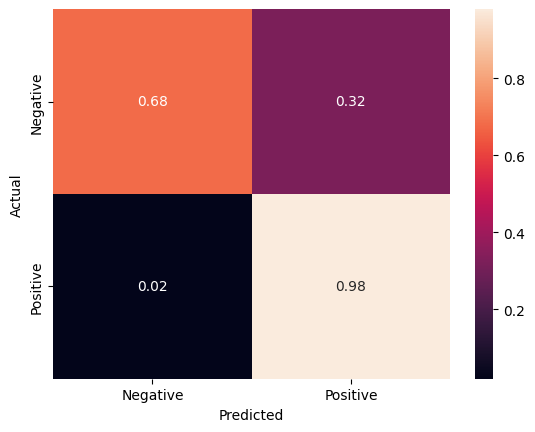

In [63]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [64]:
y_test_pred = nb.predict(X_test_bow)

metrics.accuracy_score(y_test, y_test_pred)

0.9341438703140831

Text(0.5, 23.52222222222222, 'Predicted')

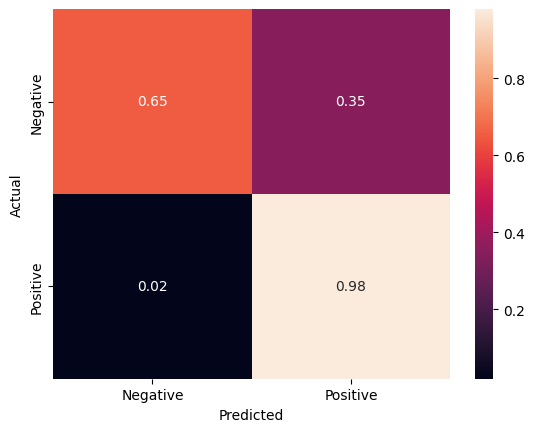

In [65]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [66]:
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred, average='weighted'))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred, average='weighted'))

Train Score (F1 Score): 0.9391485458107984
Test Score (F1 Score): 0.9308010781526062


# Random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # instantiate a Random Forest model
%time rf.fit(X_train_bow, y_train) # train the model(timing it with an IPython "magic command")


CPU times: user 1.56 s, sys: 17.9 ms, total: 1.58 s
Wall time: 1.58 s


RandomForestClassifier()

In [68]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = rf.predict(X_train_bow)

metrics.accuracy_score(y_train, y_train_pred)

0.9777064685019422

In [69]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 700,  106],
       [  26, 5089]])

Text(0.5, 23.52222222222222, 'Predicted')

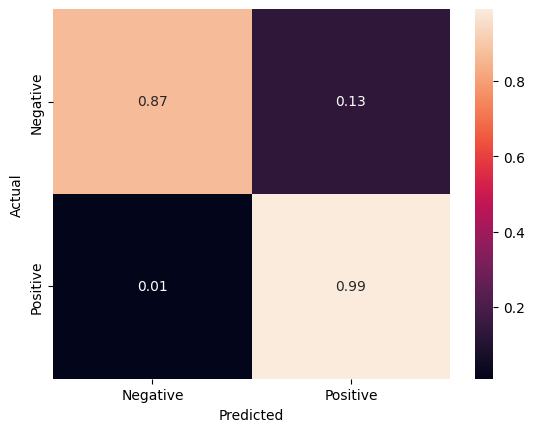

In [70]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [71]:
y_test_pred = rf.predict(X_test_bow)

metrics.accuracy_score(y_test, y_test_pred)

0.9316109422492401

Text(0.5, 23.52222222222222, 'Predicted')

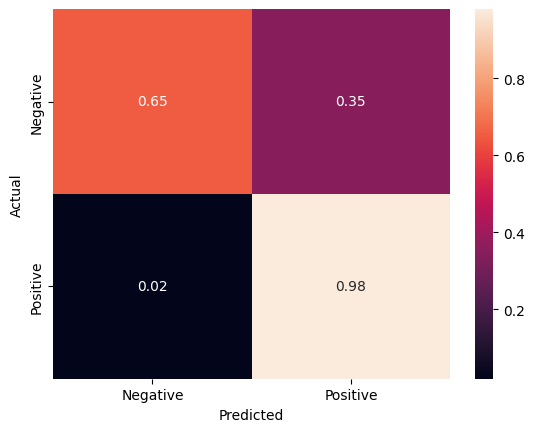

In [72]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [73]:
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred, average='weighted'))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred, average='weighted'))

Train Score (F1 Score): 0.9772108848092362
Test Score (F1 Score): 0.9284883326822829


# Hyperparameter tuning Random forest  algorithm

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Instantiate a Random Forest model
rf = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
%time grid_search.fit(X_train_bow, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Make predictions on training and test sets using the best model
best_rf_model = grid_search.best_estimator_
y_train_pred = best_rf_model.predict(X_train_bow)
y_test_pred = best_rf_model.predict(X_test_bow)

# Calculate accuracy on training and test sets
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy on Train Data:", train_accuracy)
print("Accuracy on Test Data:", test_accuracy)


CPU times: user 12min 42s, sys: 1.5 s, total: 12min 43s
Wall time: 12min 58s
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9283909225681379
Accuracy on Train Data: 0.9721330856274278
Accuracy on Test Data: 0.9326241134751773


# saving the model and preprocessor

In [79]:
joblib.dump(best_rf_model, 'best_rf_model.pkl')
joblib.dump(vocab, 'count_vectorizer_vocab.pkl')

NameError: name 'joblib' is not defined